Making a sample neural network on TensorFlow.

In [1]:
import tensorflow as tf

First, multi-layer perceptron.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
print(y_train[0:5])

[5 0 4 1 9]


In [5]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

2023-07-28 18:58:28.568243: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-28 18:58:28.568332: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-28 18:58:28.568344: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-28 18:58:28.568851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-28 18:58:28.569182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
print(y_train[0:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices ((x_test, y_test)).batch(50)

In [10]:
from tensorflow.keras.layers import Flatten
flat = Flatten(dtype='float32')

print(x_train.shape)
print(flat(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [11]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [12]:
def forward(x):
    return tf.matmul(x,W) + b

In [17]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [24]:
def model(x):
    x = flat(x)
    return activate(x)

In [25]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [31]:
def train (x,y):
    with tf.GradientTape() as tape:
        loss = cross_entropy(y, model(x))
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W,b]))
    return loss.numpy()

In [32]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 0.25)

In [33]:
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 

epoch  0 batch 500 loss: 402.5702
epoch  0 batch 1000 loss: 344.53265
end of epoch  0 loss 461481.75 accuracy 0.65206665
epoch  1 batch 500 loss: 365.1266
epoch  1 batch 1000 loss: 325.00385
end of epoch  1 loss 458748.8 accuracy 0.6559333
epoch  2 batch 500 loss: 346.27234
epoch  2 batch 1000 loss: 336.95895
end of epoch  2 loss 453419.28 accuracy 0.66103333
epoch  3 batch 500 loss: 368.41364
epoch  3 batch 1000 loss: 332.78177
end of epoch  3 loss 459142.0 accuracy 0.656
epoch  4 batch 500 loss: 351.72223
epoch  4 batch 1000 loss: 299.56375
end of epoch  4 loss 452614.3 accuracy 0.6631
epoch  5 batch 500 loss: 345.4187
epoch  5 batch 1000 loss: 311.43112
end of epoch  5 loss 450865.2 accuracy 0.66518337
epoch  6 batch 500 loss: 357.24945
epoch  6 batch 1000 loss: 330.8289
end of epoch  6 loss 450264.88 accuracy 0.6663333
epoch  7 batch 500 loss: 345.39035
epoch  7 batch 1000 loss: 309.9415
end of epoch  7 loss 452757.4 accuracy 0.66436666
epoch  8 batch 500 loss: 345.39423
epoch  8 b

In [34]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.66443336
test accuracy 0.6629


Text(0, 0.5, 'loss')

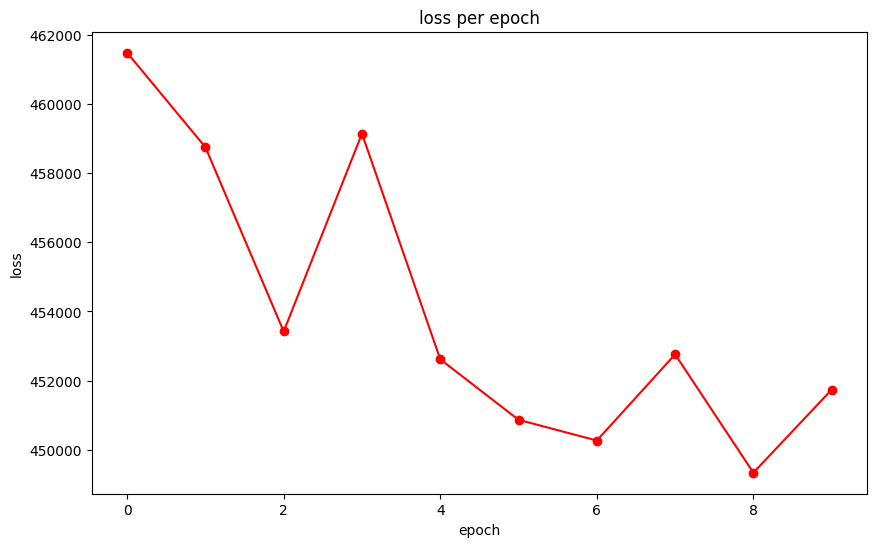

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

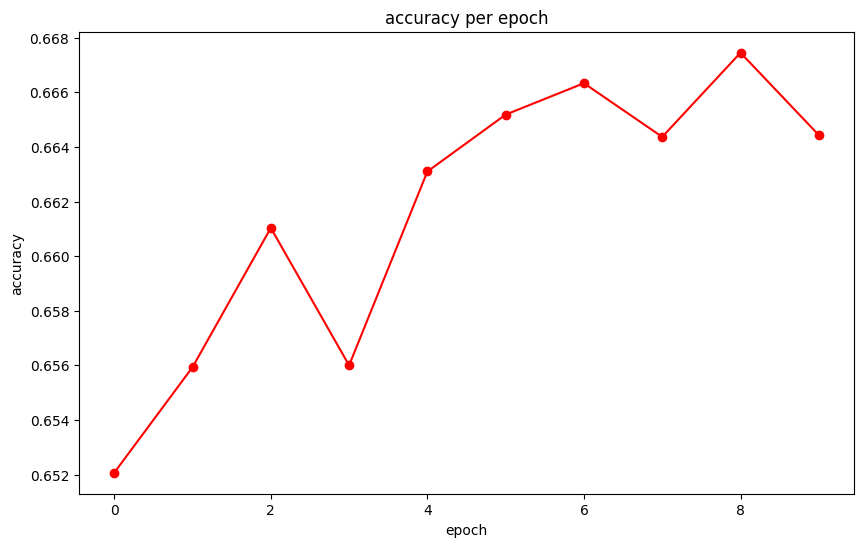

In [36]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

Making a CNN.

In [38]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [39]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [40]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

In [41]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [42]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [43]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [44]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

In [45]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [46]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [48]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [49]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

In [50]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [51]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [52]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [53]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [54]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

In [55]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [56]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [57]:
def y_CNN(x): return tf.nn.softmax(fc(x))

In [59]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [61]:
optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

In [62]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()

In [63]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [64]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [65]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  

epoch  0 batch 50 loss: 78.521194 accuracy 0.53999996
epoch  0 batch 100 loss: 40.872356 accuracy 0.74
epoch  0 batch 150 loss: 46.122948 accuracy 0.7
epoch  0 batch 200 loss: 14.368689 accuracy 0.94
epoch  0 batch 250 loss: 20.398703 accuracy 0.84
epoch  0 batch 300 loss: 19.364761 accuracy 0.9
epoch  0 batch 350 loss: 23.895773 accuracy 0.82
epoch  0 batch 400 loss: 13.024152 accuracy 0.88
epoch  0 batch 450 loss: 17.955236 accuracy 0.9
epoch  0 batch 500 loss: 13.919489 accuracy 0.96
epoch  0 batch 550 loss: 15.303941 accuracy 0.91999996
epoch  0 batch 600 loss: 22.40572 accuracy 0.82
epoch  0 batch 650 loss: 14.216887 accuracy 0.88
epoch  0 batch 700 loss: 5.5826473 accuracy 0.97999996
epoch  0 batch 750 loss: 29.271624 accuracy 0.9
epoch  0 batch 800 loss: 10.429706 accuracy 0.91999996
epoch  0 batch 850 loss: 18.135689 accuracy 0.88
epoch  0 batch 900 loss: 10.418995 accuracy 0.94
epoch  0 batch 950 loss: 16.918142 accuracy 0.9
epoch  0 batch 1000 loss: 9.889475 accuracy 0.96
epo

In [ ]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))            

batch 100 accuracy 0.96
